In [149]:
#importing the neccessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

In [150]:
df = pd.read_csv("focus.csv")

In [151]:
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016.0,"£8,000",Manual,NaN,Petrol,0.999,"38,852",NaN,NaN,/ad/25451236
1,Focus,2019.0,"£13,400",Manual,NaN,Petrol,0.999,"11,952",NaN,NaN,/ad/25466927
2,Focus,2019.0,"£14,600",Manual,NaN,Petrol,1.498,"22,142",NaN,NaN,/ad/25484363
3,Focus,2016.0,"£9,450",Manual,NaN,Diesel,1.56,"14,549",NaN,NaN,/ad/20444868
4,Focus,2015.0,"£9,999",Manual,NaN,Diesel,1.56,"7,010",NaN,NaN,/ad/22551057


In [152]:
df.shape

(5604, 11)

In [153]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuel type',
       'engine size', 'mileage2', 'fuel type2', 'engine size2', 'reference'],
      dtype='object')

In [162]:
df.dtypes

model           object
year            object
price           object
transmission    object
mileage         object
fuel type       object
engine size     object
mileage2        object
fuel type2      object
engine size2    object
reference       object
dtype: object

Now, I will begin with the data cleaning

In [163]:
df['price'] = df['price'].str.replace("£", "") # removing "£" from price column

In [164]:
df['year'] = df['year'].astype('str') # splitting year column to remove decimal part
df['year'] = df['year'].apply(lambda x: x.split('.')[0])

In [165]:
df['price'] = df['price'].str.replace(',', '') # removing "," from price, mileage & mileage2 columns
df['mileage2'] = df['mileage2'].str.replace(',', '')
df['mileage'] = df['mileage'].str.replace(',', '')

In [166]:
df.isnull().sum()

model             56
year               0
price             56
transmission      56
mileage          875
fuel type       3416
engine size      101
mileage2          95
fuel type2       875
engine size2     875
reference          0
dtype: int64

In [167]:
df['reference'] = df['reference'].astype('str') #removing the unwanted characters from reference
df['reference'] = df['reference'].apply(lambda x: x.replace('/ad/', ''))
df['reference'] = df['reference'].apply(lambda x: x.replace('ad', ''))

In [168]:
df['engine size'] = df['engine size'].str.replace("£", "")

In [169]:
df['model'] = df['model'].fillna('Focus') # filling the model column with "Focus", since the dataset is about the Focus model

In [170]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce') #filling price NA's with mean
df['price'] = df['price'].fillna(value = df['price'].mean())

In [171]:
df['transmission'] = df['transmission'].fillna(method = 'ffill') # fill NA in transmission column using 'ffill'

In [172]:
df.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,Focus,2016,8000.0,Manual,NaN,Petrol,0.999,38852,NaN,NaN,25451236
1,Focus,2019,13400.0,Manual,NaN,Petrol,0.999,11952,NaN,NaN,25466927
2,Focus,2019,14600.0,Manual,NaN,Petrol,1.498,22142,NaN,NaN,25484363
3,Focus,2016,9450.0,Manual,NaN,Diesel,1.56,14549,NaN,NaN,20444868
4,Focus,2015,9999.0,Manual,NaN,Diesel,1.56,7010,NaN,NaN,22551057


In [173]:
df.dropna(subset = ['mileage2'], inplace = True) #drop NAs in mileage2 column and assign to a new column called "Mileage"
del df['mileage']

In [174]:
df.dropna(subset = ['fuel type2'], inplace = True) # drop fuel type column and deleting NAs in fuel type column
del df['fuel type']

In [175]:
# deleting engine size2 column and removing NAs from engine size column
df.dropna(subset = ['engine size'], inplace = True)
del df['engine size2']

In [176]:
df.head()

,model,year,price,transmission,engine size,mileage2,fuel type2,reference
10,Focus,2018,12300.0,Manual,145,57.7,Petrol,25435268
11,Focus,2015,7500.0,Manual,20,61.4,Petrol,25476700
12,Focus,2017,9600.0,Manual,0,74.3,Diesel,25476685
13,Focus,2015,9500.0,Automatic,165,44.8,Petrol,25476687
14,Focus,2016,9400.0,Manual,20,61.4,Petrol,25476699


In [177]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
engine size     0
mileage2        0
fuel type2      0
reference       0
dtype: int64

In [178]:
df.drop(df.index[df['fuel type2'] == 'Other'], inplace = True) # deleting characters other than "Pretol" or "Diesel" from fuel2 column

In [179]:
df.shape

(4679, 8)

In [180]:
df.reset_index(drop = True) # resetting index

,model,year,price,transmission,engine size,mileage2,fuel type2,reference
0,Focus,2018,12300.0,Manual,145,57.7,Petrol,25435268
1,Focus,2015,7500.0,Manual,20,61.4,Petrol,25476700
2,Focus,2017,9600.0,Manual,0,74.3,Diesel,25476685
3,Focus,2015,9500.0,Automatic,165,44.8,Petrol,25476687
4,Focus,2016,9400.0,Manual,20,61.4,Petrol,25476699
...,...,...,...,...,...,...,...,...
4674,Focus,2018,12995.0,Manual,145,57.7,Petrol,25443467
4675,Focus,2014,5995.0,Manual,20,67.3,Diesel,25139588
4676,Focus,2019,17499.0,Automatic,145,50.4,Petrol,25388571
4677,Focus,2006,1495.0,Manual,125,58.9,Diesel,25049249


In [181]:
df.dtypes

model            object
year             object
price           float64
transmission     object
engine size      object
mileage2         object
fuel type2       object
reference        object
dtype: object

In [186]:
col = [ 'year','engine size', 'reference']  #coverting year, engine size & reference to dtype numeric
for x in col:
    df[x] = pd.to_numeric(df[x], downcast='signed', errors = 'coerce')


In [190]:
df['Car_age'] = 2021 - df['year'] #Calculating age of car

In [191]:
df['mileage2'] = df[ 'mileage2'].astype(float) # converting mileage to float

In [192]:
df['price'] = pd.to_numeric(df['price'], downcast='signed', errors = 'coerce') #converting price to int dtype 

In [193]:
df.dtypes

model            object
year            float64
price             int32
transmission     object
engine size       int16
mileage2        float64
fuel type2       object
reference         int32
Car_age         float64
dtype: object

EXPLORATORY DATA ANALYSIS

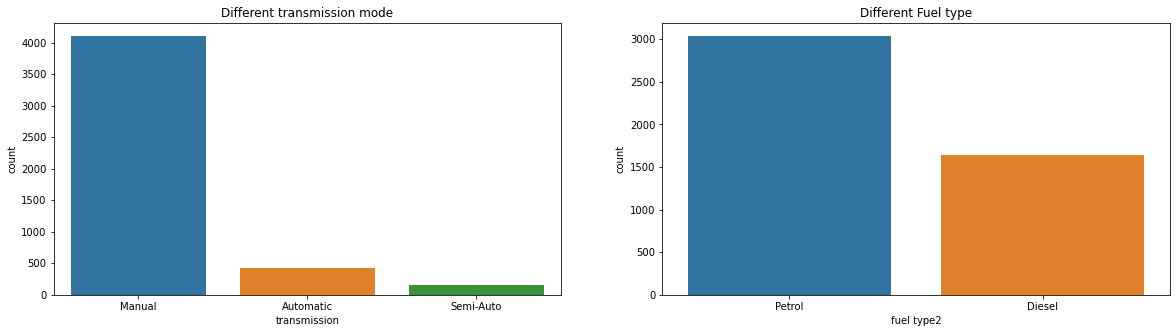

In [194]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5)) # exploring thr different transmission and fuel type mode for the cars
ax3.set_title('Different transmission mode')
ax=sns.countplot(x="transmission",data=df,ax=ax3)
ax4.set_title('Different Fuel type')
ax=sns.countplot(x="fuel type2",data=df,ax=ax4)



We can see that majority of the cars have manual transmissions and and uses petrol.

<Figure size 2160x720 with 0 Axes>

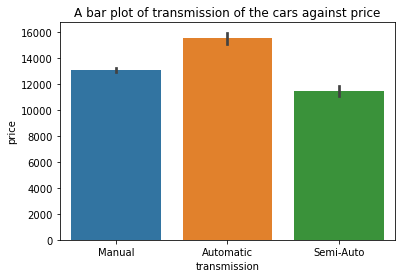

<Figure size 2160x720 with 0 Axes>

In [195]:
sns.barplot(x ='transmission', y ='price', data=df)
plt.title("A bar plot of transmission of the cars against price")
plt.figure(figsize = (30, 10))

We could see that cars with automatics transmission are more pricey, and also, price plays a little difference regarding the between a car with Manual & Semi_Auto transmission. 

<Figure size 2880x720 with 0 Axes>

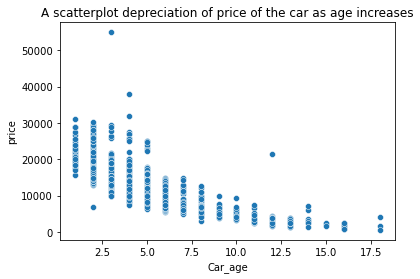

<Figure size 2880x720 with 0 Axes>

In [198]:
sns.scatterplot(data = df, x = df['Car_age'], y = df['price']) #scatterplot of age of car against price
plt.title("A scatterplot depreciation of price of the car as age increases")
plt.figure(figsize = (40, 10))

we could see that age of the car has a huge impact on the price, as indicated from the graph. 

<Figure size 2880x720 with 0 Axes>

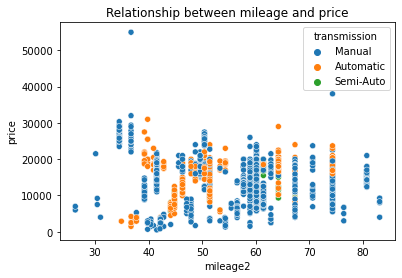

<Figure size 2880x720 with 0 Axes>

In [203]:
sns.scatterplot(data = df, x = df['mileage2'], y = df['price'], hue = 'transmission') #scatterplot of age of car against price
plt.title("Relationship between mileage and price")
plt.figure(figsize = (40, 10))

we could see that a car with automatic transmission relatively high mileage commands a better price than either of a car with Manual or Semi_auto

<Figure size 2160x864 with 0 Axes>

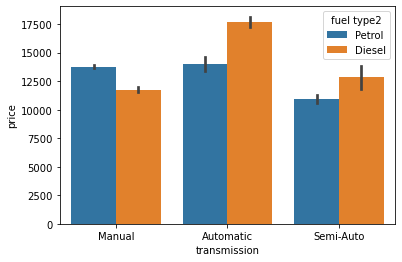

<Figure size 2160x864 with 0 Axes>

In [201]:
sns.barplot(x = "transmission", y = "price", hue = "fuel type2", data = df);
plt.figure(figsize = (30,12))

In [210]:
df1 = df[['price', 'engine size', 'mileage2', 'Car_age', 'reference']]

<AxesSubplot:>

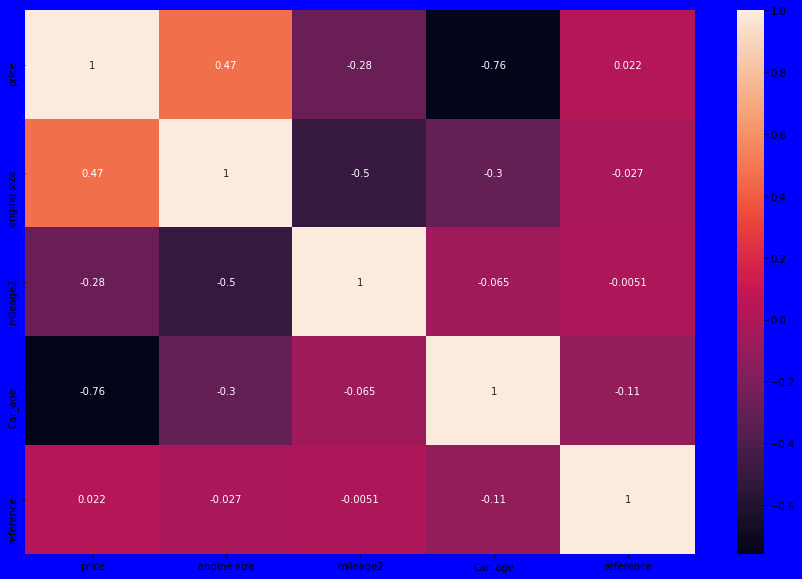

In [211]:
# ploting heatmap
plt.figure(figsize=[15,10], facecolor='blue')
sns.heatmap(df1.corr(), annot=True)

As corroborated from the heatmap above, the age of a car is negativelly corrolated with the price, while the mileage, reference have negligible impact on the price. The engine size of the car is also moderately corrolated with the price of the car as seen from the heat map.